# Stock Market Analysis Project

## Introduction
This project involves analyzing the stock market performance of companies listed in the FTSE100 index, focusing on Kingfisher plc (KGF.L). The analysis includes data visualization and statistical analysis of stock prices and returns.


## Data Sources
- Stock price data: Obtained from Yahoo Finance or Google Finance.
- Financial statements: Extracted from Kingfisher's annual reports.

## Analysis Techniques Used
1. Stock market data analysis:
    - Time series analysis
    - Descriptive statistics
    - Visualization with Python (matplotlib, seaborn)
    - Statistical tests
2. Fundamental analysis:
    - Analysis of financial statements (income statement, balance sheet, cash flow statement)
    - Financial ratio analysis
3. Investment advice:
    - Recommendations based on analysis findings

In [174]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


## Project Structure
1. **Data Collection and Cleaning**:

In [175]:
# Load the dataset


index_data = pd.read_csv("KGF.L.csv",sep=",")
index_data.head()

# Remove missing values
index_data_cleaned = index_data.dropna()

#Preview of the first few rows after cleaning the DataFrame
print("\nAfter removing NaN values:")
print(index_data_cleaned.head())



After removing NaN values:
         Date  KGF.L Adj Close  KGF.L Volume  TPK.L Adj Close  TPK.L Volume  \
0  04/01/2022       312.647705       8393249      1490.648193        842619   
1  05/01/2022       320.203003      10864232      1489.275513        396962   
2  06/01/2022       319.933197       7613055      1480.124756        546409   
3  07/01/2022       314.356628       5755645      1467.771362        566538   
4  10/01/2022       305.452118       5170225      1438.489258       1157806   

   FTSE 100 Price  
0         7615.54  
1         7622.16  
2         7630.57  
3         7666.31  
4         7632.74  


In [176]:
# Display summary statistics
summary_stats = index_data_cleaned.describe()
print(summary_stats)

       KGF.L Adj Close  KGF.L Volume  TPK.L Adj Close  TPK.L Volume  \
count       524.000000  5.240000e+02       524.000000  5.240000e+02   
mean        236.243377  8.489991e+06       928.469043  7.752863e+05   
std          22.677389  4.818482e+06       177.597979  5.938513e+05   
min         192.238998  1.196479e+06       689.223389  6.934700e+04   
25%         223.093826  5.418124e+06       796.116745  4.070510e+05   
50%         231.501106  7.283648e+06       884.580353  6.418695e+05   
75%         243.842487  1.011199e+07       966.121811  9.218135e+05   
max         320.203003  4.188769e+07      1496.138428  6.643134e+06   

       FTSE 100 Price  
count      524.000000  
mean      7491.873855  
std        228.695151  
min       6826.150000  
25%       7375.212500  
50%       7500.045000  
75%       7627.125000  
max       8014.310000  


In [177]:
# Subset containing closing prices for LGEN.L and PUK
closing_prices_subset = index_data_cleaned[['KGF.L Adj Close', 'TPK.L Adj Close', 'FTSE 100 Price']]

print(closing_prices_subset)

     KGF.L Adj Close  TPK.L Adj Close  FTSE 100 Price
0         312.647705      1490.648193         7615.54
1         320.203003      1489.275513         7622.16
2         319.933197      1480.124756         7630.57
3         314.356628      1467.771362         7666.31
4         305.452118      1438.489258         7632.74
..               ...              ...             ...
519       225.100006       798.380676         7491.37
520       220.899994       793.021057         7445.25
521       221.500000       785.477966         7485.28
522       220.399994       784.088440         7450.37
523       216.000000       770.391724         7516.87

[524 rows x 3 columns]


In [178]:
# Summary statistics for 'LGEN.L Close' and 'PUK Close'
summary_stats1 = index_data_cleaned[['KGF.L Adj Close', 'TPK.L Adj Close', 'FTSE 100 Price']].describe()
# Round the summary statistics to two decimal places using DataFrame.round()
summary_stats1_rounded = summary_stats1.round(2)

print(summary_stats1_rounded)

       KGF.L Adj Close  TPK.L Adj Close  FTSE 100 Price
count           524.00           524.00          524.00
mean            236.24           928.47         7491.87
std              22.68           177.60          228.70
min             192.24           689.22         6826.15
25%             223.09           796.12         7375.21
50%             231.50           884.58         7500.04
75%             243.84           966.12         7627.12
max             320.20          1496.14         8014.31


**Stock Market Analysis**:

## Summary statistics
    

In [179]:
import pandas as pd
from tabulate import tabulate

# Summary statistics for 'LGEN.L Close' and 'PUK Close'
summary_stats1 = index_data_cleaned[['KGF.L Adj Close', 'TPK.L Adj Close', 'FTSE 100 Price']].describe()

# Calculate returns for 'LGEN.L Close', 'PUK Close', and 'FTSE 100 Price'
closing_prices_subset['KGF.L Return'] = closing_prices_subset['KGF.L Adj Close'].pct_change()
closing_prices_subset['TPK.L Return'] = closing_prices_subset['TPK.L Adj Close'].pct_change()
closing_prices_subset['FTSE 100 Return'] = closing_prices_subset['FTSE 100 Price'].pct_change()

# Summary statistics for 'LGEN.L Close', 'PUK Close', and 'FTSE 100 Price' including returns
summary_stats1 = closing_prices_subset[['KGF.L Adj Close', 'KGF.L Return','TPK.L Adj Close','TPK.L Return', 'FTSE 100 Price','FTSE 100 Return']].describe()

# Round the summary statistics to six decimal places using DataFrame.round()
summary_stats1_rounded = summary_stats1.round(5)

# Convert the DataFrame to a beautiful table
table = tabulate(summary_stats1_rounded, headers='keys', tablefmt='pretty')

# Print the table
print(table)


+-------+-----------------+--------------+-----------------+--------------+----------------+-----------------+
|       | KGF.L Adj Close | KGF.L Return | TPK.L Adj Close | TPK.L Return | FTSE 100 Price | FTSE 100 Return |
+-------+-----------------+--------------+-----------------+--------------+----------------+-----------------+
| count |      524.0      |    523.0     |      524.0      |    523.0     |     524.0      |      523.0      |
| mean  |    236.24338    |   -0.00049   |    928.46904    |   -0.00104   |   7491.87385   |      1e-05      |
|  std  |    22.67739     |   0.02062    |    177.59798    |    0.021     |   228.69515    |     0.00885     |
|  min  |     192.239     |   -0.12224   |    689.22339    |   -0.09301   |    6826.15     |    -0.03766     |
|  25%  |    223.09383    |   -0.01103   |    796.11675    |   -0.01309   |   7375.2125    |    -0.00466     |
|  50%  |    231.50111    |     0.0      |    884.58035    |   -0.00065   |    7500.045    |    -0.00062     |
|

<ipython-input-179-835a79780270>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices_subset['KGF.L Return'] = closing_prices_subset['KGF.L Adj Close'].pct_change()
<ipython-input-179-835a79780270>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices_subset['TPK.L Return'] = closing_prices_subset['TPK.L Adj Close'].pct_change()


##  Visualizations

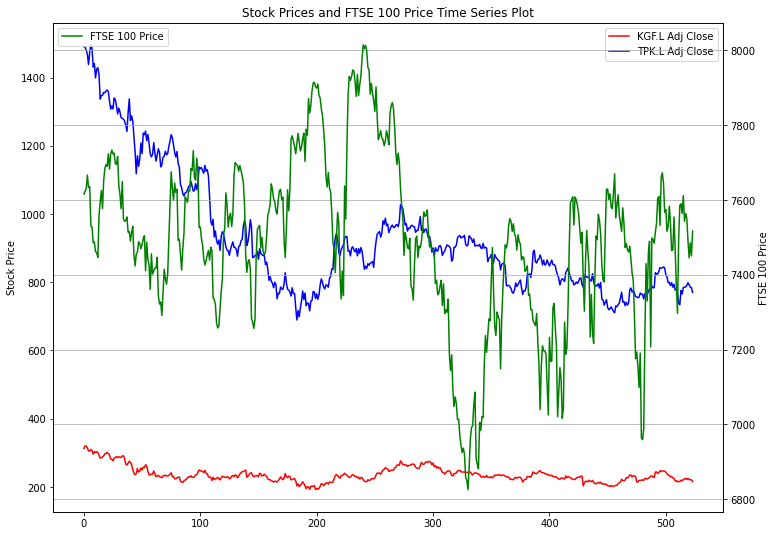

In [180]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 9))

# Plot 'LGEN.L Close' and 'PUK Close' on the primary y-axis
plt.plot(index_data_cleaned.index, index_data_cleaned['KGF.L Adj Close'], label='KGF.L Adj Close', color='red')
plt.plot(index_data_cleaned.index, index_data_cleaned['TPK.L Adj Close'], label='TPK.L Adj Close', color='blue')
plt.legend()

#plt.xlabel('Date')
# Set the y-axis label
plt.ylabel('Stock Price')

# Create a secondary y-axis for 'FTSE 100 Price'
ax2 = plt.gca().twinx()
ax2.plot(index_data_cleaned.index, index_data_cleaned['FTSE 100 Price'], label='FTSE 100 Price', color='green')
ax2.set_ylabel('FTSE 100 Price')
plt.legend(loc='upper left')
# Set the x-axis label
plt.xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title
plt.title('Stock Prices and FTSE 100 Price Time Series Plot')

# Show legend
#plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()



Summary Statistics:
       KGF.L Adj Close  KGF.L Volume  TPK.L Adj Close  TPK.L Volume  \
count       524.000000  5.240000e+02       524.000000  5.240000e+02   
mean        236.243377  8.489991e+06       928.469043  7.752863e+05   
std          22.677389  4.818482e+06       177.597979  5.938513e+05   
min         192.238998  1.196479e+06       689.223389  6.934700e+04   
25%         223.093826  5.418124e+06       796.116745  4.070510e+05   
50%         231.501106  7.283648e+06       884.580353  6.418695e+05   
75%         243.842487  1.011199e+07       966.121811  9.218135e+05   
max         320.203003  4.188769e+07      1496.138428  6.643134e+06   

       FTSE 100 Price  
count      524.000000  
mean      7491.873855  
std        228.695151  
min       6826.150000  
25%       7375.212500  
50%       7500.045000  
75%       7627.125000  
max       8014.310000  




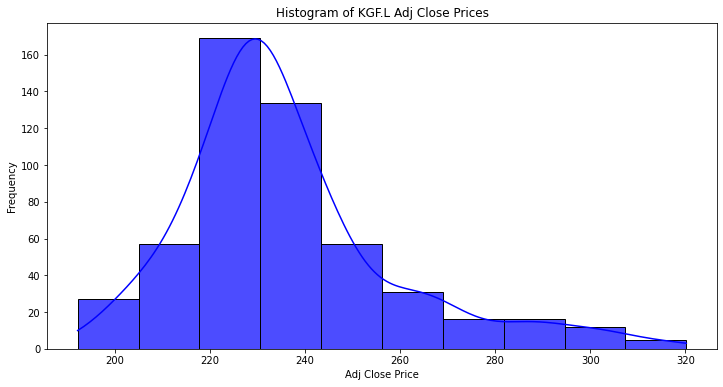

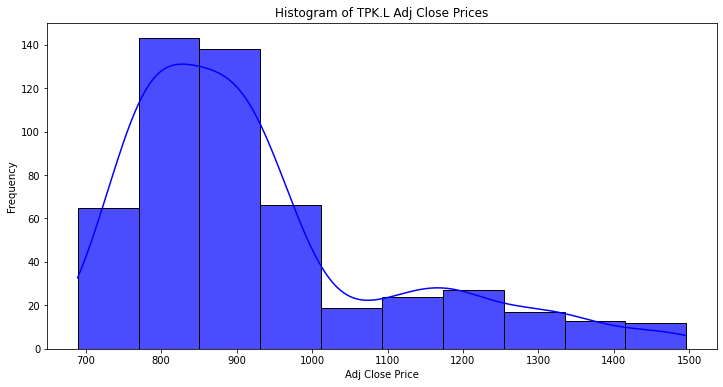

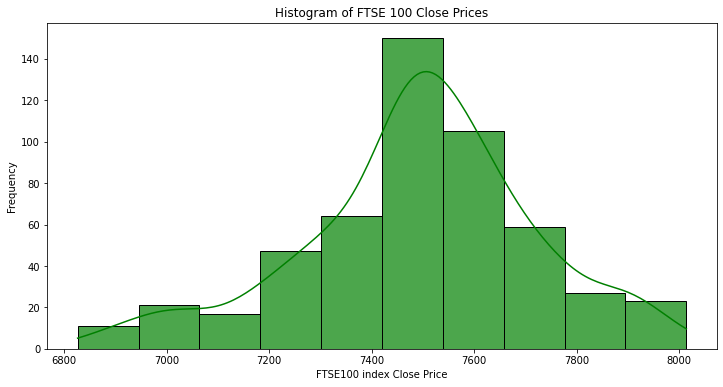

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains the current data
df = pd.DataFrame(index_data_cleaned)

# 1. Summary Statistics
print("Summary Statistics:")
print(df.describe())
print("\n")

# 2. Data Visualization
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['KGF.L Adj Close'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of KGF.L Adj Close Prices')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['TPK.L Adj Close'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of TPK.L Adj Close Prices')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['FTSE 100 Price'], bins=10, kde=True, color='green', alpha=0.7)
plt.title('Histogram of FTSE 100 Close Prices')
plt.xlabel('FTSE100 index Close Price')
plt.ylabel('Frequency')
plt.show()



C:\Users\Sci-hub\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


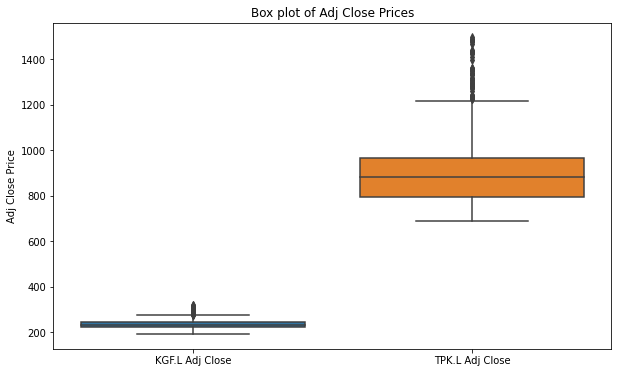

C:\Users\Sci-hub\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


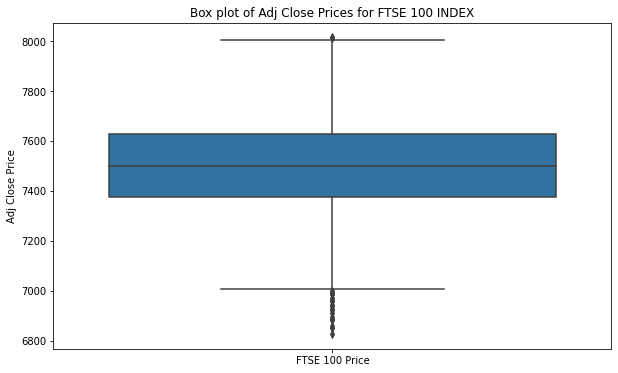

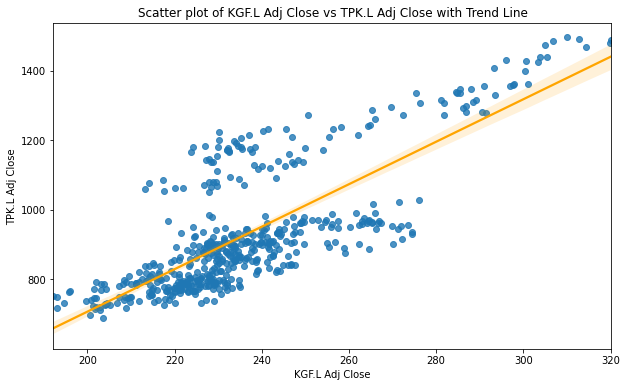

In [87]:
# Box plot for distributional statistics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['KGF.L Adj Close', 'TPK.L Adj Close']])
plt.title('Box plot of Adj Close Prices')
plt.ylabel('Adj Close Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['FTSE 100 Price']])
plt.title('Box plot of Adj Close Prices for FTSE 100 INDEX')
plt.ylabel('Adj Close Price')
plt.show()

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='KGF.L Adj Close', y='TPK.L Adj Close', line_kws={"color": "orange"})
plt.title('Scatter plot of KGF.L Adj Close vs TPK.L Adj Close with Trend Line')
plt.xlabel('KGF.L Adj Close')
plt.ylabel('TPK.L Adj Close')
plt.show()


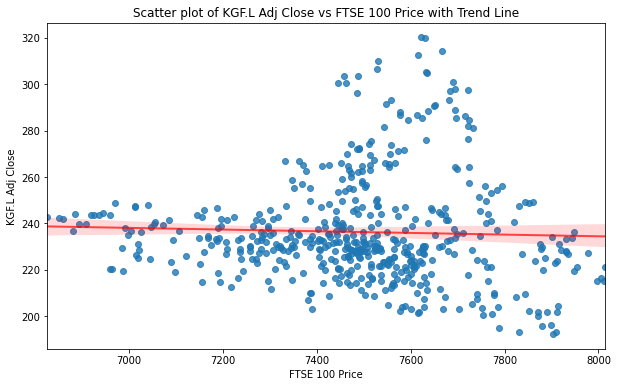

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the current data
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='FTSE 100 Price', y='KGF.L Adj Close', line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Scatter plot of KGF.L Adj Close vs FTSE 100 Price with Trend Line')
plt.xlabel('FTSE 100 Price')
plt.ylabel('KGF.L Adj Close')
plt.show()


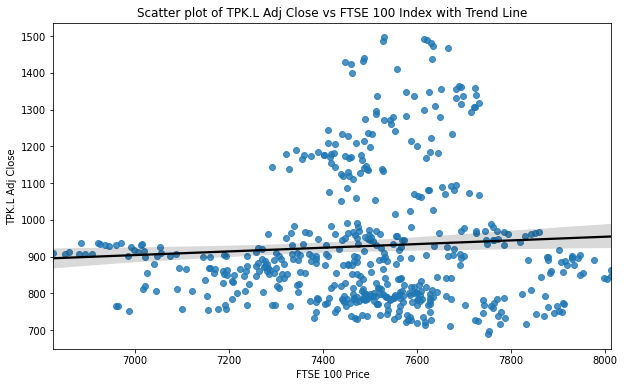

In [88]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='FTSE 100 Price', y='TPK.L Adj Close', line_kws={"color":"black"})
plt.title('Scatter plot of TPK.L Adj Close vs FTSE 100 Index with Trend Line')
plt.xlabel('FTSE 100 Price')
plt.ylabel('TPK.L Adj Close')
plt.show()


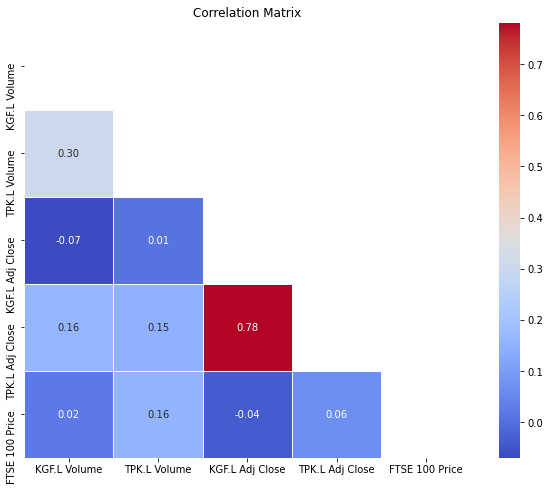

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation Analysis
correlation_matrix = df[['KGF.L Volume', 'TPK.L Volume', 'KGF.L Adj Close', 'TPK.L Adj Close', 'FTSE 100 Price']].corr()

# Create a mask to display only the lower triangular part of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [105]:
from tabulate import tabulate

# Calculate the correlation matrix
correlation_matrix = df[['KGF.L Adj Close', 'TPK.L Adj Close', 'FTSE 100 Price']].corr()

# Round the correlation matrix to two decimal places
#correlation_matrix_rounded = correlation_matrix.round(2)

# Print the correlation matrix as a neat table
print("Correlation Matrix:")
print(tabulate(correlation_matrix_rounded, headers='keys', tablefmt='pretty'))


Correlation Matrix:
+-----------------+-----------------+-----------------+----------------+
|                 | KGF.L Adj Close | TPK.L Adj Close | FTSE 100 Price |
+-----------------+-----------------+-----------------+----------------+
| KGF.L Adj Close |       1.0       |      0.78       |     -0.04      |
| TPK.L Adj Close |      0.78       |       1.0       |      0.06      |
| FTSE 100 Price  |      -0.04      |      0.06       |      1.0       |
+-----------------+-----------------+-----------------+----------------+


In [102]:
# Calculate stock returns
df['KGF.L Return'] = df['KGF.L Adj Close'].pct_change()
df['TPK.L Return'] = df['TPK.L Adj Close'].pct_change()
df['FTSE 100 Index Return'] = df['FTSE 100 Price'].pct_change()

# Calculate correlation matrix for stock returns
correlation_matrix_returns = df[['KGF.L Return', 'TPK.L Return','FTSE 100 Index Return']].corr()

# Round the correlation matrix to two decimal places
correlation_matrix_returns_rounded = correlation_matrix_returns.round(2)

# Print the correlation matrix as a neat table
print("Correlation Matrix for Stock Returns:")
print(tabulate(correlation_matrix_returns_rounded, headers='keys', tablefmt='pretty'))


Correlation Matrix for Stock Returns:
+-----------------------+--------------+--------------+-----------------------+
|                       | KGF.L Return | TPK.L Return | FTSE 100 Index Return |
+-----------------------+--------------+--------------+-----------------------+
|     KGF.L Return      |     1.0      |     0.66     |         -0.06         |
|     TPK.L Return      |     0.66     |     1.0      |         -0.06         |
| FTSE 100 Index Return |    -0.06     |    -0.06     |          1.0          |
+-----------------------+--------------+--------------+-----------------------+


**Calculation and visualization of stock returns**

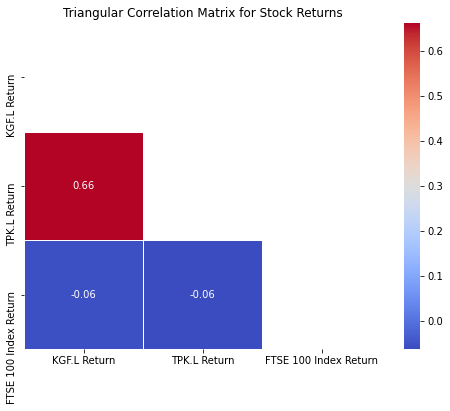

In [108]:
# Calculate stock returns
df['KGF.L Return'] = df['KGF.L Adj Close'].pct_change()
df['TPK.L Return'] = df['TPK.L Adj Close'].pct_change()
df['FTSE 100 Index Return'] = df['FTSE 100 Price'].pct_change()

# Correlation Analysis for returns
correlation_matrix_returns = df[['KGF.L Return', 'TPK.L Return', 'FTSE 100 Index Return']].corr()

# Create a mask to display only the lower triangular part of the heatmap
#mask = np.triu(np.ones_like(correlation_matrix_returns, dtype=bool))

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_returns, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Triangular Correlation Matrix for Stock Returns')
plt.show()


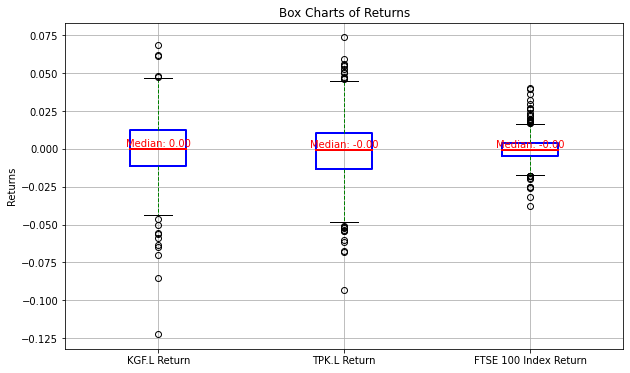

In [111]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot box charts for returns
boxprops = dict(linestyle='-', linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
whiskerprops = dict(linestyle='--', linewidth=1, color='green')

plt.boxplot([
    df['KGF.L Return'].dropna(),
    df['TPK.L Return'].dropna(),
    df['FTSE 100 Index Return'].dropna()
], labels=['KGF.L Return', 'TPK.L Return', 'FTSE 100 Index Return'], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops)

# Annotate medians and quartiles
plt.text(1, df['KGF.L Return'].median(), f'Median: {df["KGF.L Return"].median():.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')
plt.text(2, df['TPK.L Return'].median(), f'Median: {df["TPK.L Return"].median():.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')
plt.text(3, df['FTSE 100 Index Return'].median(), f'Median: {df["FTSE 100 Index Return"].median():.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')

# Show grid
plt.grid(True)

# Set the y-axis label
plt.ylabel('Returns')

# Set the title
plt.title('Box Charts of Returns')

# Show plot
plt.show()


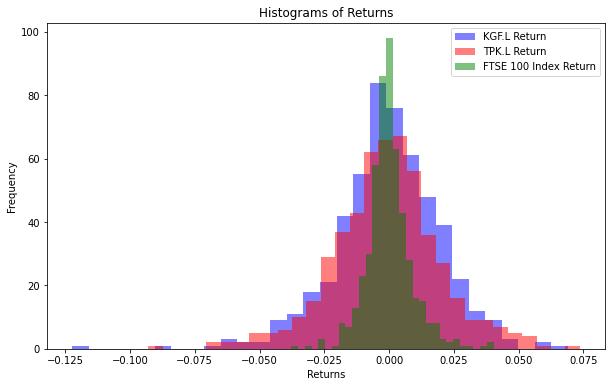

In [112]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot histograms of returns
plt.hist(df['KGF.L Return'].dropna(), bins=30, alpha=0.5, label='KGF.L Return', color='blue')
plt.hist(df['TPK.L Return'].dropna(), bins=30, alpha=0.5, label='TPK.L Return', color='red')
plt.hist(df['FTSE 100 Index Return'].dropna(), bins=30, alpha=0.5, label='FTSE 100 Index Return', color='green')

# Set labels and title
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histograms of Returns')

# Show legend
plt.legend()

# Show plot
plt.show()


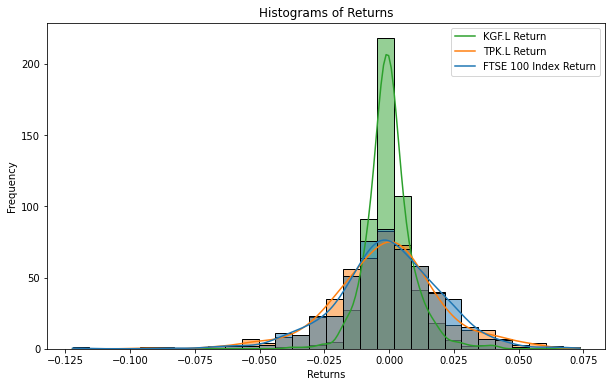

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot histograms of returns using seaborn
sns.histplot(data=df[['KGF.L Return', 'TPK.L Return', 'FTSE 100 Index Return']], bins=30, kde=True, alpha=0.5)

# Set labels and title
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histograms of Returns')

# Show legend
plt.legend(['KGF.L Return', 'TPK.L Return', 'FTSE 100 Index Return'])

# Show plot
plt.show()


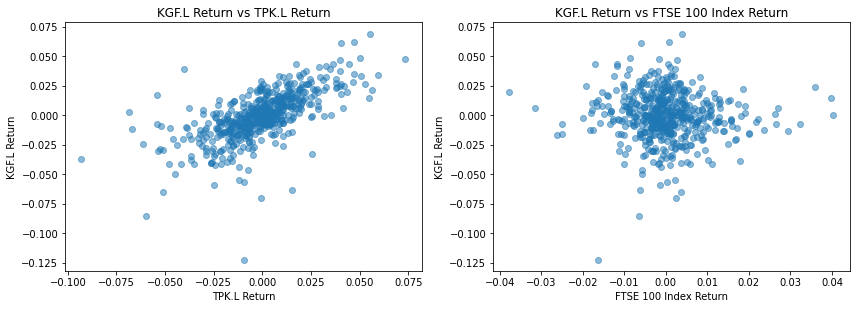

In [114]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Scatter plot of KGF.L Return against TPK.L Return
plt.subplot(2, 2, 1)
plt.scatter(df['TPK.L Return'], df['KGF.L Return'], alpha=0.5)
plt.xlabel('TPK.L Return')
plt.ylabel('KGF.L Return')
plt.title('KGF.L Return vs TPK.L Return')

# Scatter plot of KGF.L Return against FTSE 100 Index Return
plt.subplot(2, 2, 2)
plt.scatter(df['FTSE 100 Index Return'], df['KGF.L Return'], alpha=0.5)
plt.xlabel('FTSE 100 Index Return')
plt.ylabel('KGF.L Return')
plt.title('KGF.L Return vs FTSE 100 Index Return')

# Show plots
plt.tight_layout()
plt.show()


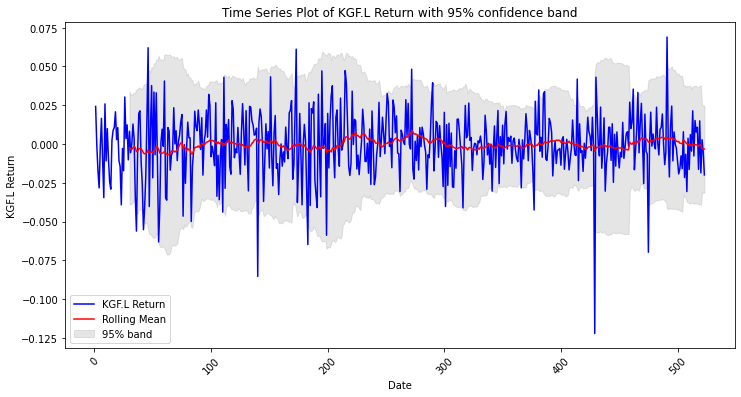

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate rolling mean and standard deviation for 'KGF.L Return'
rolling_mean = df['KGF.L Return'].rolling(window=30).mean()
rolling_std = df['KGF.L Return'].rolling(window=30).std()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'KGF.L Return'
plt.plot(df.index, df['KGF.L Return'], label='KGF.L Return', color='blue')

# Plot rolling mean and 95% lines
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.fill_between(df.index, rolling_mean - 2 * rolling_std, rolling_mean + 2 * rolling_std, color='gray', alpha=0.2, label='95% band')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('KGF.L Return')
plt.title('Time Series Plot of KGF.L Return with 95% confidence band')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show plot
plt.show()


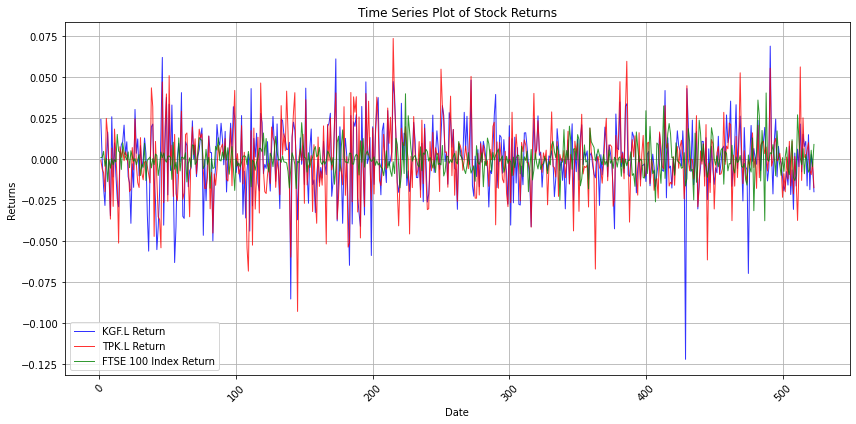

In [118]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot time series of returns for KGF.L Return
plt.plot(df.index, df['KGF.L Return'], label='KGF.L Return', linestyle='-', linewidth=1, color='blue', alpha=0.8)

# Plot time series of returns for TPK.L Return
plt.plot(df.index, df['TPK.L Return'], label='TPK.L Return', linestyle='-', linewidth=1, color='red', alpha=0.8)

# Plot time series of returns for FTSE 100 Index Return
plt.plot(df.index, df['FTSE 100 Index Return'], label='FTSE 100 Index Return', linestyle='-', linewidth=1, color='green', alpha=0.8)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Time Series Plot of Stock Returns')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


## Regression modelling

In [122]:
import statsmodels.api as sm

# Define the independent variables
X = df[['FTSE 100 Price', 'TPK.L Adj Close']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['KGF.L Adj Close']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        KGF.L Adj Close   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     420.0
Date:                Tue, 07 May 2024   Prob (F-statistic):          2.36e-109
Time:                        08:34:45   Log-Likelihood:                -2127.1
No. Observations:                 524   AIC:                             4260.
Df Residuals:                     521   BIC:                             4273.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             207.7410     20.239     

In [125]:
import statsmodels.api as sm

# Remove rows with missing values
df_cleaned = df[['FTSE 100 Index Return', 'TPK.L Return', 'KGF.L Return']].dropna()

# Define the independent variables
X = df_cleaned[['FTSE 100 Index Return', 'TPK.L Return']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df_cleaned['KGF.L Return']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           KGF.L Return   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 07 May 2024   Prob (F-statistic):           7.47e-66
Time:                        08:38:51   Log-Likelihood:                 1439.3
No. Observations:                 523   AIC:                            -2873.
Df Residuals:                     520   BIC:                            -2860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

## Time series modeling

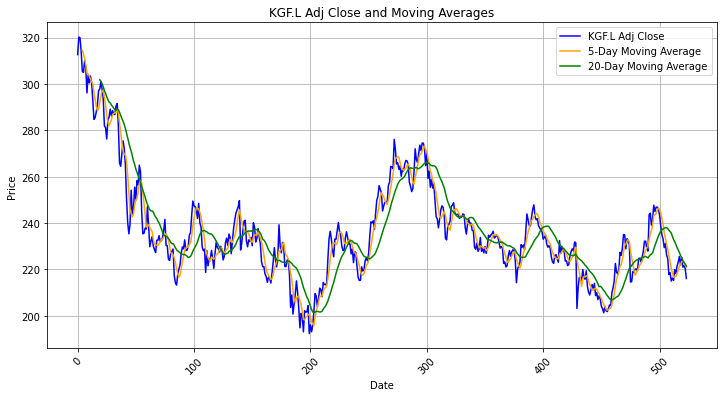

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the moving averages
df['KGF.L 5-Day MA'] = df['KGF.L Adj Close'].rolling(window=5).mean()
df['KGF.L 20-Day MA'] = df['KGF.L Adj Close'].rolling(window=20).mean()

# Plotting the moving averages
plt.figure(figsize=(12, 6))

# Plot the KGF.L Adj Close
plt.plot(df.index, df['KGF.L Adj Close'], label='KGF.L Adj Close', color='blue')

# Plot the 5-day moving average
plt.plot(df.index, df['KGF.L 5-Day MA'], label='5-Day Moving Average', color='orange')

# Plot the 20-day moving average
plt.plot(df.index, df['KGF.L 20-Day MA'], label='20-Day Moving Average', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KGF.L Adj Close and Moving Averages')
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [168]:
import numpy as np

# Calculate errors for 5-day moving average
error_5day = df['KGF.L Adj Close'] - df['KGF.L 5-Day MA']
mae_5day = np.mean(np.abs(error_5day))
mse_5day = np.mean(error_5day**2)
rmse_5day = np.sqrt(mse_5day)

# Calculate errors for 20-day moving average
error_20day = df['KGF.L Adj Close'] - df['KGF.L 20-Day MA']
mae_20day = np.mean(np.abs(error_20day))
mse_20day = np.mean(error_20day**2)
rmse_20day = np.sqrt(mse_20day)# Calculate Mean Absolute Percentage Error (MAPE)
mape_5day = np.mean(np.abs(error_5day / df['KGF.L Adj Close'])) * 100
mape_20day = np.mean(np.abs(error_20day / df['KGF.L Adj Close'])) * 100




# Print error metrics
print("Error Metrics for 5-Day Moving Average:")
print(f"Mean Absolute Error (MAE): {mae_5day:.2f}")
print(f"Mean Squared Error (MSE): {mse_5day:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_5day:.2f}")
# Print MAPE
print("Mean Absolute Percentage Error (MAPE) for 5-Day Moving Average: {:.2f}%".format(mape_5day))
print("\n")
print("Error Metrics for 20-Day Moving Average:")
print(f"Mean Absolute Error (MAE): {mae_20day:.2f}")
print(f"Mean Squared Error (MSE): {mse_20day:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_20day:.2f}")

print("Mean Absolute Percentage Error (MAPE) for 20-Day Moving Average: {:.2f}%".format(mape_20day))


Error Metrics for 5-Day Moving Average:
Mean Absolute Error (MAE): 3.89
Mean Squared Error (MSE): 26.28
Root Mean Squared Error (RMSE): 5.13
Mean Absolute Percentage Error (MAPE) for 5-Day Moving Average: 1.65%


Error Metrics for 20-Day Moving Average:
Mean Absolute Error (MAE): 8.34
Mean Squared Error (MSE): 108.67
Root Mean Squared Error (RMSE): 10.42
Mean Absolute Percentage Error (MAPE) for 20-Day Moving Average: 3.58%


In [161]:
import pandas as pd

# Create a DataFrame to store error metrics
error_df = pd.DataFrame({
    'Moving Average': ['5-Day', '20-Day'],
    'MAE': [mae_5day, mae_20day],
    'MSE': [mse_5day, mse_20day],
    'RMSE': [rmse_5day, rmse_20day]
})

# Set 'Moving Average' as index
error_df.set_index('Moving Average', inplace=True)

# Display the DataFrame
print("Error Metrics Comparison for 5-Day and 20-Day Moving Averages:")
print(error_df)


Error Metrics Comparison for 5-Day and 20-Day Moving Averages:
                     MAE         MSE       RMSE
Moving Average                                 
5-Day           3.889080   26.275060   5.125920
20-Day          8.337791  108.665257  10.424263


## Simple exponential smoothing

In [152]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'df' is your DataFrame containing the 'KGF.L Adj Close' data
# Replace 'df' with your actual DataFrame name

# Extract the 'KGF.L Adj Close' data
kgf_data = df['KGF.L Adj Close']

# Perform exponential smoothing
smoothed_data = SimpleExpSmoothing(kgf_data).fit(smoothing_level=0.2, optimized=False).fittedvalues

# Add the smoothed data back to your DataFrame
df['Smoothed KGF.L'] = smoothed_data

# Print the first few rows of the DataFrame to verify the results
print(df.head())


        Date  KGF.L Adj Close  KGF.L Volume  TPK.L Adj Close  TPK.L Volume  \
0 2022-04-01       312.647705       8393249      1490.648193        842619   
1 2022-05-01       320.203003      10864232      1489.275513        396962   
2 2022-06-01       319.933197       7613055      1480.124756        546409   
3 2022-07-01       314.356628       5755645      1467.771362        566538   
4 2022-10-01       305.452118       5170225      1438.489258       1157806   

   FTSE 100 Price  KGF.L Return  TPK.L Return  FTSE 100 Index Return  \
0         7615.54           NaN           NaN                    NaN   
1         7622.16      0.024166     -0.000921               0.000869   
2         7630.57     -0.000843     -0.006144               0.001103   
3         7666.31     -0.017430     -0.008346               0.004684   
4         7632.74     -0.028326     -0.019950              -0.004379   

   KGF.L 5-Day MA  KGF.L 20-Day MA  Smoothed KGF.L  
0             NaN              NaN      312.6

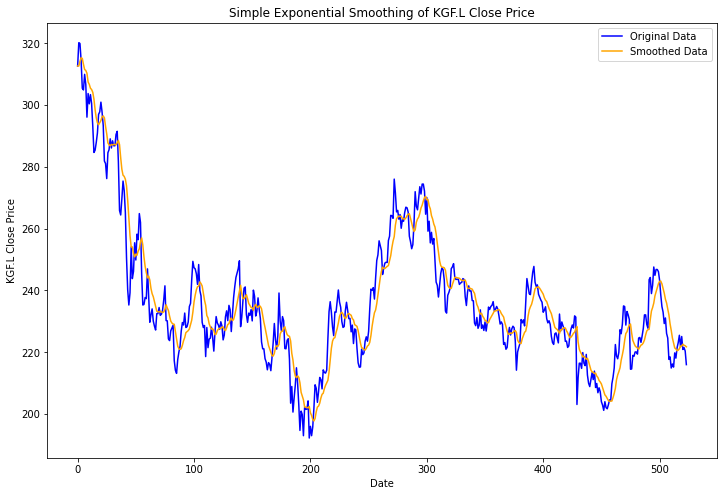

In [156]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

# Plot original 'KGF.L Adj Close' data
plt.plot(df.index, df['KGF.L Adj Close'], label='Original Data', color='blue')

# Plot smoothed 'KGF.L' data
plt.plot(df.index, df['Smoothed KGF.L'], label='Smoothed Data', color='orange')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('KGF.L Close Price')
plt.title('Simple Exponential Smoothing of KGF.L Close Price')
plt.legend()

# Show plot
plt.show()


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame containing the original and smoothed data
# Replace 'df' with your actual DataFrame name

# Calculate error measures
mae_ses = mean_absolute_error(df['KGF.L Adj Close'], df['Smoothed KGF.L'])
mse_ses = mean_squared_error(df['KGF.L Adj Close'], df['Smoothed KGF.L'])
rmse_ses = mean_squared_error(df['KGF.L Adj Close'], df['Smoothed KGF.L'], squared=False)
# Calculate absolute percentage error
absolute_percentage_error = np.abs((df['KGF.L Adj Close'] - df['Smoothed KGF.L']) / df['KGF.L Adj Close'])

# Calculate MAPE
mape_ses = np.mean(absolute_percentage_error) * 100

# Print error measures
print("Error Measures for Simple Exponential Smoothing (SES):")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_ses))
print("Mean Squared Error (MSE): {:.2f}".format(mse_ses))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_ses))
print("Mean Absolute Percentage Error (MAPE) for Simple Exponential Smoothing (SES): {:.2f}%".format(mape_ses))



Error Measures for Simple Exponential Smoothing (SES):
Mean Absolute Error (MAE): 5.66
Mean Squared Error (MSE): 53.81
Root Mean Squared Error (RMSE): 7.34
Mean Absolute Percentage Error (MAPE) for Simple Exponential Smoothing (SES): 2.41%


## Double exponential smoothing

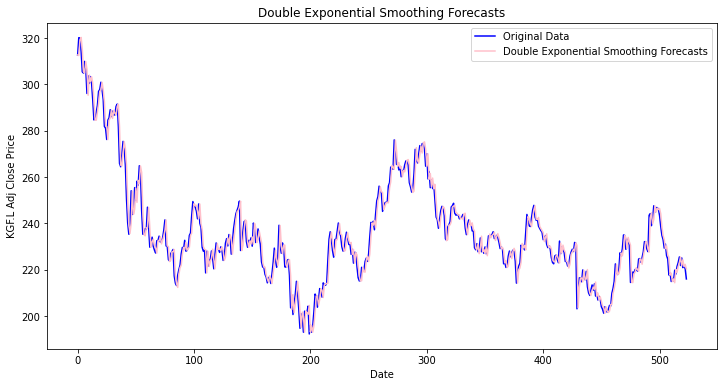

In [166]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(df.index, df['KGF.L Adj Close'], label='Original Data', color='blue')

# Plot Double Exponential Smoothing forecasts
plt.plot(df.index, fitted_values, label='Double Exponential Smoothing Forecasts', color='pink')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('KGF.L Adj Close Price')
plt.title('Double Exponential Smoothing Forecasts')
plt.legend()

# Show plot
plt.show()

In [167]:
from statsmodels.tsa.holtwinters import Holt

# Fit Double Exponential Smoothing model
model = Holt(df['KGF.L Adj Close']).fit()

# Predict values using the fitted model
fitted_values = model.fittedvalues

# Calculate errors
error = df['KGF.L Adj Close'] - fitted_values
mae = np.mean(np.abs(error))
mse = np.mean(error**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(error / df['KGF.L Adj Close'])) * 100

# Print error measures
print("Error Measures for Double Exponential Smoothing:")
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Error Measures for Double Exponential Smoothing:
Mean Absolute Error (MAE): 3.78
Mean Squared Error (MSE): 25.99
Root Mean Squared Error (RMSE): 5.10
Mean Absolute Percentage Error (MAPE): 1.60%


## Holt's Winters exponential smoothing

Error Measures for Holt-Winters Triple Exponential Smoothing:
Mean Absolute Error (MAE): 3.60
Mean Squared Error (MSE): 23.64
Root Mean Squared Error (RMSE): 4.86
Mean Absolute Percentage Error (MAPE): 1.53%


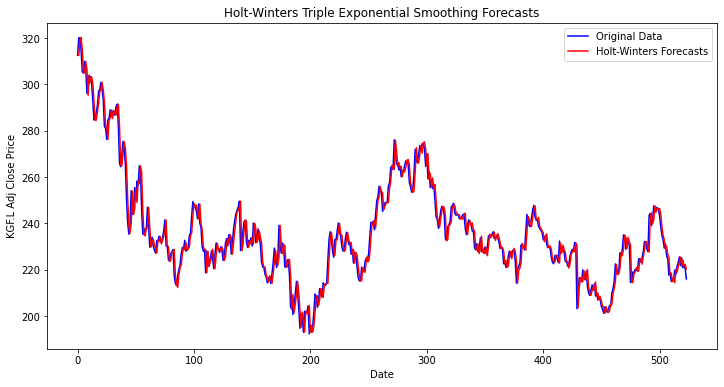

In [170]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters Triple Exponential Smoothing model
model = ExponentialSmoothing(df['KGF.L Adj Close'], seasonal='add', seasonal_periods=7).fit()

# Predict values using the fitted model
fitted_values = model.fittedvalues

# Calculate errors
error = df['KGF.L Adj Close'] - fitted_values
mae = np.mean(np.abs(error))
mse = np.mean(error**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(error / df['KGF.L Adj Close'])) * 100

# Print error measures
print("Error Measures for Holt-Winters Triple Exponential Smoothing:")
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(df.index, df['KGF.L Adj Close'], label='Original Data', color='blue')

# Plot Holt-Winters Triple Exponential Smoothing forecasts
plt.plot(df.index, fitted_values, label='Holt-Winters Forecasts', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('KGF.L Adj Close Price')
plt.title('Holt-Winters Triple Exponential Smoothing Forecasts')
plt.legend()

# Show plot
plt.show()
